### Python Code 

In [5]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# read data
data_raw = pd.read_csv("../posts/2024-10-02-ts-fundamentals-whats-a-time-series/example_ts_data.csv")

data_raw = (
    # select columns
    data_raw[["Country", "Product", "Date", "Revenue"]]
    # change data types
    .assign(
        Date = pd.to_datetime(data_raw["Date"]), 
        Revenue = pd.to_numeric(data_raw["Revenue"])
    )
)

# print the first few rows
print(data_raw.head())


         Country    Product       Date  Revenue
0  United States  Ice Cream 2019-01-01       10
1  United States  Ice Cream 2019-02-01       12
2  United States  Ice Cream 2019-03-01       15
3  United States  Ice Cream 2019-04-01        9
4  United States  Ice Cream 2019-05-01       11


In [7]:
# filter on specific series
us_cookie_raw = data_raw[(data_raw["Country"] == "United States") & (data_raw["Product"] == "Cookies")]

us_cookie_raw.set_index("Date", inplace=True)

print(us_cookie_raw.head())

                  Country  Product  Revenue
Date                                       
2019-01-01  United States  Cookies       25
2019-02-01  United States  Cookies       10
2019-03-01  United States  Cookies       15
2019-04-01  United States  Cookies       45
2019-05-01  United States  Cookies       55


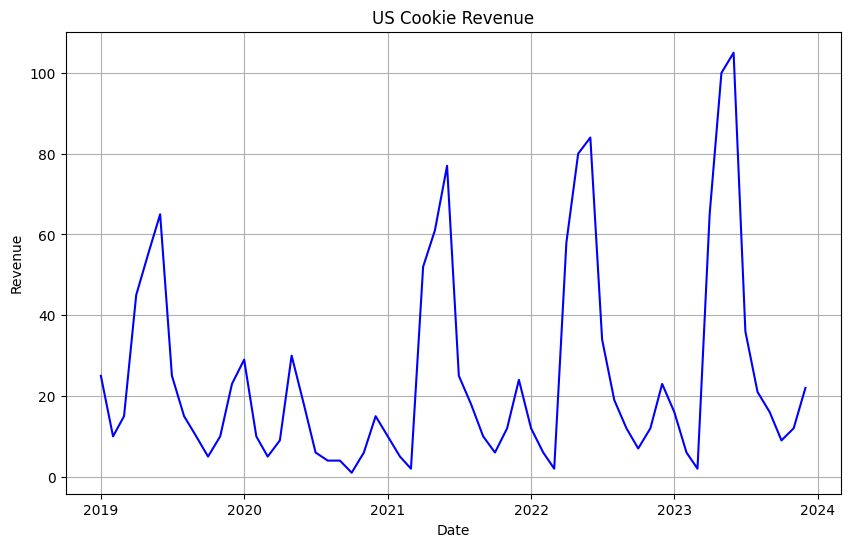

In [8]:
# plot the data
plt.figure(figsize=(10,6))
plt.plot(us_cookie_raw.index, us_cookie_raw["Revenue"], label = "Cookies Revenue", color = "blue")
plt.title("US Cookie Revenue")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)

In [9]:
# calculate the 2x12 month moving average
us_cookie_ma = us_cookie_raw.copy()

us_cookie_ma["2x12_MA"] = us_cookie_ma["Revenue"].rolling(window = 12, center = True).mean().rolling(window=2, center = True).mean()

print(us_cookie_ma.head())

                  Country  Product  Revenue  2x12_MA
Date                                                
2019-01-01  United States  Cookies       25      NaN
2019-02-01  United States  Cookies       10      NaN
2019-03-01  United States  Cookies       15      NaN
2019-04-01  United States  Cookies       45      NaN
2019-05-01  United States  Cookies       55      NaN


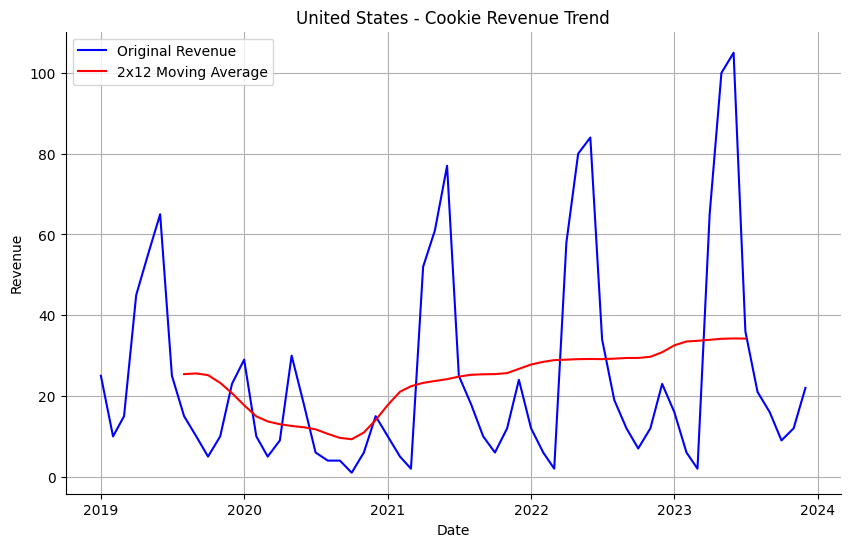

In [10]:
# plot the moving average
plt.figure(figsize=(10,6))
plt.plot(us_cookie_ma.index, us_cookie_ma["Revenue"], label = "Original Revenue", color = "blue")
plt.plot(us_cookie_ma.index, us_cookie_ma["2x12_MA"], label = "2x12 Moving Average", color = "red")

plt.title("United States - Cookie Revenue Trend")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.grid(True)
plt.legend()

ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# save the plot
# plt.savefig("chart3", dpi = 300, bbox_inches = "tight")

In [16]:
# detrend the data
us_cookie_detrend = us_cookie_ma.copy()

us_cookie_detrend["Detrended"] = us_cookie_detrend["Revenue"] - us_cookie_detrend["2x12_MA"]

print(us_cookie_detrend.head(20))

                  Country  Product  Revenue    2x12_MA  Detrended
Date                                                             
2019-01-01  United States  Cookies       25        NaN        NaN
2019-02-01  United States  Cookies       10        NaN        NaN
2019-03-01  United States  Cookies       15        NaN        NaN
2019-04-01  United States  Cookies       45        NaN        NaN
2019-05-01  United States  Cookies       55        NaN        NaN
2019-06-01  United States  Cookies       65        NaN        NaN
2019-07-01  United States  Cookies       25        NaN        NaN
2019-08-01  United States  Cookies       15  25.416667 -10.416667
2019-09-01  United States  Cookies       10  25.583333 -15.583333
2019-10-01  United States  Cookies        5  25.166667 -20.166667
2019-11-01  United States  Cookies       10  23.250000 -13.250000
2019-12-01  United States  Cookies       23  20.708333   2.291667
2020-01-01  United States  Cookies       29  17.708333  11.291667
2020-02-01